### Weather Py - Katelyn Burke 

#### Trends I observed: 

-The City Latitude vs. Max Temperature scatter pot shows that when a city is closer to the equator (0 degrees latitude) the maximum temperature increases, meaning that the city is hotter. 

-This plot also shows that the maximum temperature drops significantly and becomes much colder between 60-80 degrees latitude, cities that most likely fall in Antarctica. 

-The City Latitude vs. Humidity (%)  Scatter Plot does not show any significant patterns. What I do notice, is that there tends to be a slightly higher average percentage of humidity between -20 and -60 degrees latitude (West of the equator).

-The City Latitude vs. Cloudiness (%)  Scatter Plot also does not show any significant patterns. It is interesting to point out that several cities (across all latitudes) had 0% cloudiness. 

-The City Latitude vs. WindSpeed (miles per hour) Scatter Plot shows that the majority of cities (across all latitudes) have wind speeds under 20 miles per hour. It is interesting to point out that only one city on the plot (approximately 70 degrees latitude) had wind speeds above 40 miles per hour. 

#### Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from ratelimiter import RateLimiter
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#### Generate Cities List 

In [2]:
# Generate Cities List 
# Randomly select at least 500 unique (non-repeat) cities 

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(len(cities))

#print(cities[1])

652


In [3]:
# Create a Data Frame
city_df = pd.DataFrame()
city_df['City'] = cities

city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['MaxTemp'] = ""
city_df['WindSpeed'] = ""

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,bredasdorp,,,,,,,,
1,taolanaro,,,,,,,,
2,casino,,,,,,,,
3,arraial do cabo,,,,,,,,
4,catacaos,,,,,,,,


#### Perform API Calls 

In [4]:
#Hard code target URL to check if API key is working

target_url = ('http://api.openweathermap.org/data/2.5/weather?q=albany&APPID=b3f86df6e93e5f333897e86987d07110')

# Run a request to endpoint and convert result to json
weather_complete = requests.get(target_url).json()

# Print the json for city Albany
print(json.dumps(weather_complete, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.65,
        "lon": -73.75
    },
    "dt": 1557066066,
    "id": 5106834,
    "main": {
        "humidity": 71,
        "pressure": 1012,
        "temp": 285.56,
        "temp_max": 287.59,
        "temp_min": 283.15
    },
    "name": "Albany",
    "rain": {
        "1h": 0.25
    },
    "sys": {
        "country": "US",
        "id": 3273,
        "message": 0.0087,
        "sunrise": 1557049473,
        "sunset": 1557100727,
        "type": 1
    },
    "visibility": 16093,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 2.6
    }
}


In [5]:
# Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name)

weather_complete = []

# URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
rate_limiter = RateLimiter(max_calls=50, period=60)

In [6]:
print("Beginning Data Retrieval")
print("-----------------------------")

city_type = []
search_count = 0

# use iterrows to iterate through pandas dataframe
for index, row in city_df.iterrows():
    with rate_limiter:
    
        city_type = row['City']
        response = requests.get(query_url + city_type).json()
    
    
        try:
            search_count += 1
            cloudiness = response["clouds"]["all"]
            city_country = reshis ssponse["sys"]["country"]
            city_humid = response["main"]["humidity"]
            city_date = response["dt"]
            city_latitude = response["coord"]["lat"]
            city_longitude = response["coord"]["lon"]
            max_temp = response["main"]["temp_max"]
            wind_speed = response["wind"]["speed"]
        
            weather_complete.append({"City": city_type, "Cloudiness": cloudiness, "Country": city_country, "Date": city_date, 
                                    "Humidity": city_humid, "Latitude": city_latitude, "Longitude": city_longitude,
                                    "Max Temp": max_temp, "Wind Speed": wind_speed})
            
            print(f"Processing Record {search_count} | {city_type}")
            response = (f"requests.get(query_url + city).json()")
        
        except(KeyError, IndexError):
            print("City not found. Skipping..")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | bredasdorp
City not found. Skipping..
Processing Record 3 | casino
Processing Record 4 | arraial do cabo
Processing Record 5 | catacaos
Processing Record 6 | bahia honda
Processing Record 7 | yulara
Processing Record 8 | tommot
Processing Record 9 | nome
Processing Record 10 | hilo
Processing Record 11 | atuona
Processing Record 12 | kodiak
Processing Record 13 | port alfred
Processing Record 14 | kichera
Processing Record 15 | agadez
Processing Record 16 | padang
City not found. Skipping..
Processing Record 18 | adrar
Processing Record 19 | hamilton
Processing Record 20 | hami
Processing Record 21 | carutapera
Processing Record 22 | karratha
Processing Record 23 | punta arenas
City not found. Skipping..
Processing Record 25 | lovozero
Processing Record 26 | kyren
City not found. Skipping..
Processing Record 28 | avarua
Processing Record 29 | albany
Processing Record 30 | roma
Processing Record 31 | gat
Proces

Processing Record 256 | loa janan
City not found. Skipping..
Processing Record 258 | pevek
Processing Record 259 | kangaatsiaq
Processing Record 260 | marrakesh
Processing Record 261 | penarroya-pueblonuevo
Processing Record 262 | bure
Processing Record 263 | lompoc
Processing Record 264 | kuryk
City not found. Skipping..
Processing Record 266 | banjar
Processing Record 267 | kinablangan
Processing Record 268 | aykhal
Processing Record 269 | shaoguan
Processing Record 270 | bethel
City not found. Skipping..
Processing Record 272 | igrim
Processing Record 273 | bontang
Processing Record 274 | zonguldak
Processing Record 275 | wanning
Processing Record 276 | sidi ali
Processing Record 277 | pasca
Processing Record 278 | ushtobe
Processing Record 279 | zhanaozen
Processing Record 280 | balkanabat
Processing Record 281 | ravar
Processing Record 282 | sangin
Processing Record 283 | hualmay
Processing Record 284 | naifaru
Processing Record 285 | coahuayana
Processing Record 286 | saint georg

Processing Record 508 | chapais
Processing Record 509 | shelburne
Processing Record 510 | pemba
Processing Record 511 | tias
Processing Record 512 | shepsi
Processing Record 513 | fonte boa
Processing Record 514 | hambantota
City not found. Skipping..
City not found. Skipping..
Processing Record 517 | jadu
Processing Record 518 | fare
Processing Record 519 | huanren
Processing Record 520 | portland
Processing Record 521 | juegang
Processing Record 522 | yuli
Processing Record 523 | dankaur
Processing Record 524 | clyde river
Processing Record 525 | north bend
Processing Record 526 | bilibino
Processing Record 527 | baykit
Processing Record 528 | chubbuck
Processing Record 529 | marzuq
Processing Record 530 | passo de camaragibe
Processing Record 531 | visby
Processing Record 532 | darhan
Processing Record 533 | kharp
Processing Record 534 | nchelenge
Processing Record 535 | doha
Processing Record 536 | poronaysk
Processing Record 537 | ixtapa
Processing Record 538 | bukachacha
Processi

#### Raw Data to a DataFrame 

In [7]:
# Convert Raw Data to DataFrame
city_df = pd.DataFrame(weather_complete)
city_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,bredasdorp,6,ZA,1557065786,64,-34.53,20.04,69.01,16.11
1,casino,10,AU,1557065914,87,-28.86,153.05,57.00,4.70
2,arraial do cabo,40,BR,1557064800,69,-22.97,-42.02,84.20,11.41
3,catacaos,40,PE,1557066182,83,-5.27,-80.68,71.65,8.90
4,bahia honda,65,CU,1557066182,77,22.90,-83.16,82.81,7.52
5,yulara,0,AU,1557061200,32,-25.24,130.99,60.80,6.93
6,tommot,100,RU,1557066182,87,58.97,126.27,37.81,11.12
7,nome,1,US,1557066171,73,30.04,-94.42,75.20,5.82
8,hilo,75,US,1557066135,83,19.71,-155.08,73.40,10.29
9,atuona,1,PF,1557066183,76,-9.80,-139.03,82.81,18.34


In [8]:
city_df.count()

City          586
Cloudiness    586
Country       586
Date          586
Humidity      586
Latitude      586
Longitude     586
Max Temp      586
Wind Speed    586
dtype: int64

In [9]:
# Export the city data into a .csv

city_df.to_csv("weather.csv")

#### Plotting The Data 

In [10]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

##### Latitude vs. Temperature Plot

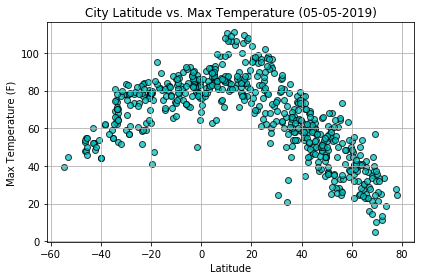

In [11]:
# Equator Latitude is 0 degrees
plt.scatter(city_df["Latitude"], city_df["Max Temp"], marker="o", facecolors="c", edgecolors="k",alpha=0.75)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.tight_layout()
plt.savefig("temperatureplot.png")
plt.show()

##### Latitude vs. Humidity Plot

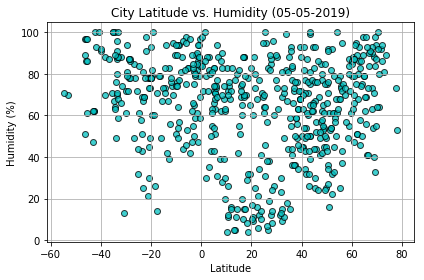

In [12]:
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker="o", facecolors="c", edgecolors="k",alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("humidityplot.png")
plt.show()

##### Latitude vs. Cloudiness Plot


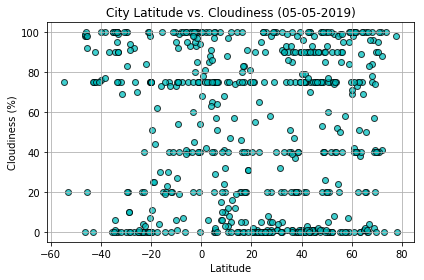

In [13]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker="o", facecolors="c", edgecolors="k",alpha=0.75)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("cloudinessplot.png")
plt.show()

##### Latitude vs. Wind Speed Plot


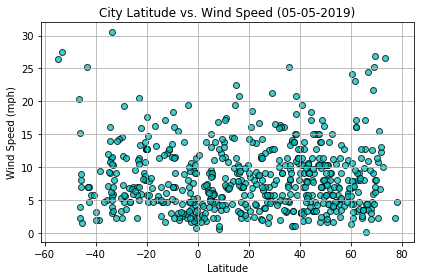

In [14]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker="o", facecolors="c", edgecolors="k",alpha=0.75)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.tight_layout()
plt.savefig("windspeedplot.png")
plt.show()